# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_key}&units={units}&q="

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

city_count = 0
set_count = 1


for city in cities:
    try:
        city_data = requests.get(query_url + city).json()
        cloudiness.append(city_data['clouds']['all'])
        country.append(city_data['sys']['country'])
        date.append(city_data['dt'])
        humidity.append(city_data['main']['humidity'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        max_temp.append(city_data['main']['temp_max'])
        wind_speed.append(city_data['wind']['speed'])
        if city_count > 48:
            city_count = 1
            set_count += 1
            city_name.append(city)
        else:
            city_count += 1
            city_name.append(city)
    
        print(f'Processing Record {city_count} of set {set_count} | {city_data["name"]}')
    except KeyError as KeyError:
        print('City not found, skipping...')
print('----------------------------------------------------------------')

Processing Record 1 of set 1 | Faanui
Processing Record 2 of set 1 | Thompson
Processing Record 3 of set 1 | Bethel
Processing Record 4 of set 1 | Mahébourg
Processing Record 5 of set 1 | Vaini
Processing Record 6 of set 1 | Bredasdorp
Processing Record 7 of set 1 | Sidi Ali
Processing Record 8 of set 1 | Carnarvon
Processing Record 9 of set 1 | Ushuaia
Processing Record 10 of set 1 | Lebu
Processing Record 11 of set 1 | Sumbe
Processing Record 12 of set 1 | Brae
Processing Record 13 of set 1 | Berlevåg
Processing Record 14 of set 1 | Jati
Processing Record 15 of set 1 | Albany
Processing Record 16 of set 1 | Pevek
Processing Record 17 of set 1 | Kavieng
Processing Record 18 of set 1 | Severo-Yeniseyskiy
Processing Record 19 of set 1 | Avarua
Processing Record 20 of set 1 | Yellowknife
Processing Record 21 of set 1 | Russell
Processing Record 22 of set 1 | Luanda
Processing Record 23 of set 1 | Karasjok
Processing Record 24 of set 1 | Hithadhoo
Processing Record 25 of set 1 | Noumea
Pr

Processing Record 41 of set 4 | Rio Grande
Processing Record 42 of set 4 | Evanston
Processing Record 43 of set 4 | Togur
Processing Record 44 of set 4 | Haines Junction
Processing Record 45 of set 4 | Chokurdakh
Processing Record 46 of set 4 | Kaitangata
Processing Record 47 of set 4 | Middelburg
Processing Record 48 of set 4 | Leningradskiy
Processing Record 49 of set 4 | Esperance
Processing Record 1 of set 5 | Anadyr
Processing Record 2 of set 5 | Egvekinot
Processing Record 3 of set 5 | Warah
Processing Record 4 of set 5 | Bubaque
Processing Record 5 of set 5 | Saint George
Processing Record 6 of set 5 | Pangnirtung
Processing Record 7 of set 5 | Rosario
City not found, skipping...
Processing Record 8 of set 5 | Aklavik
Processing Record 9 of set 5 | Portree
City not found, skipping...
Processing Record 10 of set 5 | Shaping
Processing Record 11 of set 5 | Port Lincoln
Processing Record 12 of set 5 | Gorontalo
Processing Record 13 of set 5 | Husavik
Processing Record 14 of set 5 |

Processing Record 32 of set 8 | Mwinilunga
Processing Record 33 of set 8 | Kenora
Processing Record 34 of set 8 | Dungarvan
Processing Record 35 of set 8 | Saskylakh
Processing Record 36 of set 8 | Khandyga
Processing Record 37 of set 8 | Burns Lake
Processing Record 38 of set 8 | Deūlgaon Rāja
Processing Record 39 of set 8 | Coralville
Processing Record 40 of set 8 | Narsaq
Processing Record 41 of set 8 | Ţahţā
Processing Record 42 of set 8 | Santa Fe
Processing Record 43 of set 8 | Flinders
Processing Record 44 of set 8 | Santiago del Estero
Processing Record 45 of set 8 | Urucará
City not found, skipping...
Processing Record 46 of set 8 | Krasnoyarka
Processing Record 47 of set 8 | Yeovil
Processing Record 48 of set 8 | Goderich
Processing Record 49 of set 8 | Donskoye
Processing Record 1 of set 9 | Deogarh
Processing Record 2 of set 9 | Galveston
City not found, skipping...
Processing Record 3 of set 9 | Lábrea
Processing Record 4 of set 9 | Lawrence
Processing Record 5 of set 9 | 

Processing Record 23 of set 12 | Coos Bay
Processing Record 24 of set 12 | Yarkovo
Processing Record 25 of set 12 | Daoukro
Processing Record 26 of set 12 | San Vicente
Processing Record 27 of set 12 | Cafarnaum
Processing Record 28 of set 12 | Omsukchan
Processing Record 29 of set 12 | Verkhnevilyuysk
Processing Record 30 of set 12 | Barra de Tecoanapa
Processing Record 31 of set 12 | Wewak
Processing Record 32 of set 12 | Kanye
Processing Record 33 of set 12 | Visnes
Processing Record 34 of set 12 | Moose Jaw
Processing Record 35 of set 12 | West Odessa
Processing Record 36 of set 12 | Ordzhonīkīdze
Processing Record 37 of set 12 | Betong
Processing Record 38 of set 12 | Yuanping
Processing Record 39 of set 12 | Fairview
Processing Record 40 of set 12 | Honghu
Processing Record 41 of set 12 | Bhādāsar
Processing Record 42 of set 12 | College
----------------------------------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
data_dictionary = {
    "City":city_name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
}

city_data_df = pd.DataFrame(data_dictionary)

city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,faanui,2,PF,1619423380,66,-16.4833,-151.7500,81.03,2.84
1,thompson,40,CA,1619423112,100,55.7435,-97.8558,23.00,3.36
2,bethel,1,US,1619423380,42,41.3712,-73.4140,44.60,12.66
3,mahebourg,75,MU,1619423381,83,-20.4081,57.7000,78.80,13.80
4,vaini,75,TO,1619423381,94,-21.2000,-175.2000,77.00,3.44


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

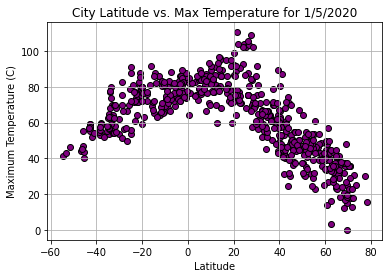

In [11]:
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Max Temperature for 1/5/2020")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (C)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("Latitude vs. Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

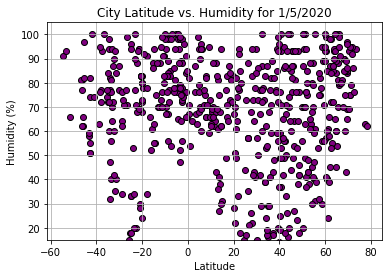

In [12]:
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Humidity for 1/5/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both")
plt.savefig("Latitude vs. Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

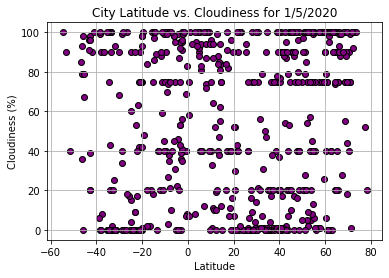

In [13]:
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Cloudiness for 1/5/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("Latitude vs. Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

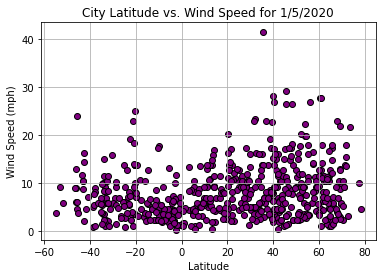

In [14]:
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Wind Speed for 1/5/2020")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("Latitude vs. Wind Speed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

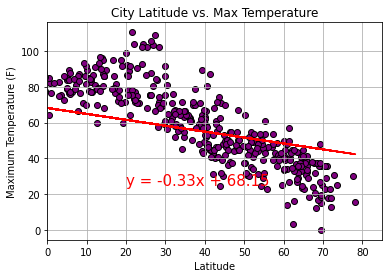

In [15]:
Latitude = city_data_df["Lat"]
Max_Temperature = city_data_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Max_Temperature)
best_fit = slope * Latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.xlim(0,85)
plt.ylabel("Maximum Temperature (F)")
plt.grid (b=True,which="major",axis="both")
plt.plot(Latitude,best_fit,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

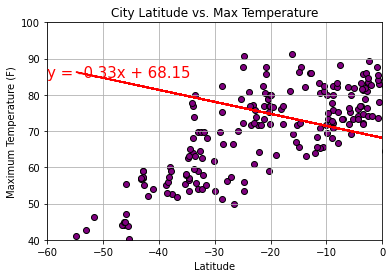

In [16]:
Latitude = city_data_df["Lat"]
Max_Temperature = city_data_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Max_Temperature)
best_fit = slope * Latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.xlim(-60,0)
plt.ylabel("Maximum Temperature (F)")
plt.ylim(40,100)
plt.grid (b=True,which="major",axis="both")
plt.plot(Latitude,best_fit,"r-")
plt.annotate(line_eq,(-60,85),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

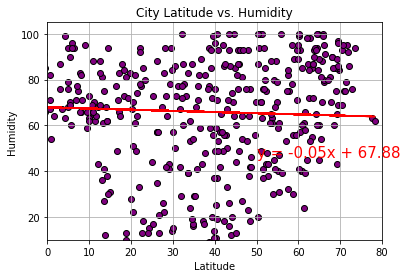

In [17]:
Latitude = city_data_df["Lat"]
Humidity = city_data_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Humidity)
best_fit = slope * Latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.xlim(0,80)
plt.ylabel("Humidity")
plt.ylim(10,105)
plt.grid (b=True,which="major",axis="both")
plt.plot(Latitude,best_fit,"r-")
plt.annotate(line_eq,(50,46),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

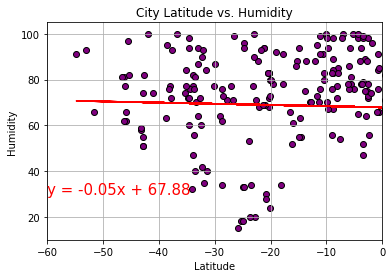

In [18]:
Latitude = city_data_df["Lat"]
Humidity = city_data_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Humidity)
best_fit = slope * Latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.xlim(-60,0)
plt.ylabel("Humidity")
plt.ylim(10,105)
plt.grid (b=True,which="major",axis="both")
plt.plot(Latitude,best_fit,"r-")
plt.annotate(line_eq,(-60,30),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

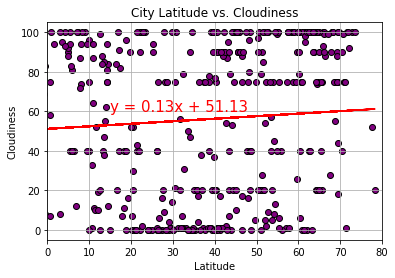

In [19]:
Latitude = city_data_df["Lat"]
Cloudiness = city_data_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Cloudiness)
best_fit = slope * Latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.xlim(0,80)
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both")
plt.plot(Latitude,best_fit,"r-")
plt.annotate(line_eq,(15,60),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

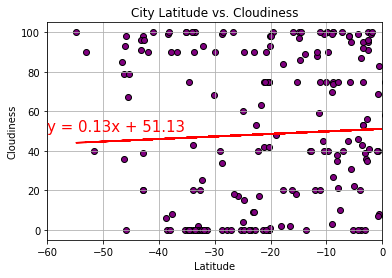

In [20]:
Latitude = city_data_df["Lat"]
Cloudiness = city_data_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Cloudiness)
best_fit = slope * Latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.xlim(-60,0)
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both")
plt.plot(Latitude,best_fit,"r-")
plt.annotate(line_eq,(-60,50),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

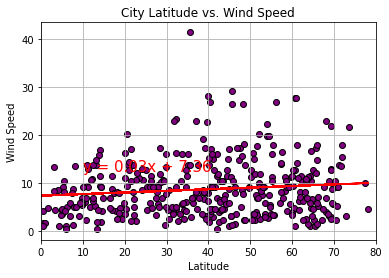

In [21]:
Latitude = city_data_df["Lat"]
Wind_Speed = city_data_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Wind_Speed)
best_fit = slope * Latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.xlim(0,80)
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both")
plt.plot(Latitude,best_fit,"r-")
plt.annotate(line_eq,(10,12.5),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

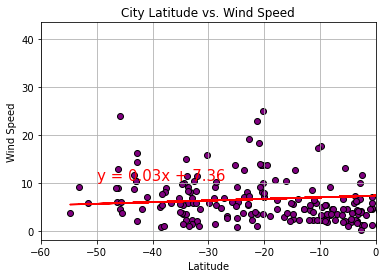

In [22]:
Latitude = city_data_df["Lat"]
Wind_Speed = city_data_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(Latitude, Wind_Speed)
best_fit = slope * Latitude + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.xlim(-60,0)
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both")
plt.plot(Latitude,best_fit,"r-")
plt.annotate(line_eq,(-50,10.5),fontsize=15,color="red")
plt.show()